In [2]:
import shap
from shap.datasets import iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# load the data

X, y = iris(display=True)

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
import pandas as pd

In [8]:
y = pd.Series(y)

In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [10]:
# split the data

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [11]:
print("The shape of training data", X_train.shape)
print("The shape of test data", X_test.shape)

The shape of training data (120, 4)
The shape of test data (30, 4)


In [12]:
# distribution of target in train and test

y_train.value_counts(normalize=True)

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

virginica     0.333333
setosa        0.333333
versicolor    0.333333
Name: proportion, dtype: float64

In [14]:
# encode the target

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [15]:
y_test

array([2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 2, 1, 1, 0, 2, 1])

In [22]:
# fit model on data

rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=10)

rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
# predictions on data

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [24]:
# accuracy scores

print("The training accuracy is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy is ", accuracy_score(y_test, y_pred_test))

The training accuracy is  1.0
The test accuracy is  0.9


In [41]:
# make an explainer

explainer = shap.TreeExplainer(model=rf, data=X_train.iloc[0:51,:], model_output="probability")

In [44]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
# base value

explainer.expected_value

array([0.31372549, 0.34117647, 0.34509804])

In [43]:
# calculate base values manually

rf.predict_proba(X_train.iloc[0:51,:]).mean(axis=0)

array([0.31372549, 0.34117647, 0.34509804])

In [45]:
# make an explainer

explainer = shap.TreeExplainer(model=rf, data=X_train, model_output="probability")

In [52]:
test_case = X_test.iloc[0:1,:]

test_case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,7.3,2.9,6.3,1.8


In [54]:
# prediction for test data

prediction = rf.predict(test_case)

prediction_prob = rf.predict_proba(test_case)

In [55]:
prediction

array([2])

In [57]:
prediction_prob

array([[0., 0., 1.]])

In [56]:
le.inverse_transform(prediction)

array(['virginica'], dtype=object)

In [68]:
# calculate the shapley values

shap_values = explainer(X_test.iloc[0:1,:])

In [69]:
shap_values.shape

(1, 4, 3)

In [71]:
shap_values

.values =
array([[[-0.0415    , -0.027     ,  0.0685    ],
        [-0.0045    , -0.02308333,  0.02758333],
        [-0.134     , -0.22666667,  0.36066668],
        [-0.147     , -0.06475   ,  0.21175   ]]])

.base_values =
array([[0.327 , 0.3405, 0.3325]])

.data =
array([[7.3, 2.9, 6.3, 1.8]])

In [72]:
shap_values.base_values

array([[0.327 , 0.3405, 0.3325]])

In [73]:
explainer.expected_value

array([0.327 , 0.3405, 0.3325])

In [74]:
shap_values.data

array([[7.3, 2.9, 6.3, 1.8]])

In [75]:
test_case

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,7.3,2.9,6.3,1.8


In [77]:
shap_values.shape

(1, 4, 3)

In [80]:
shap_values

.values =
array([[[-0.0415    , -0.027     ,  0.0685    ],
        [-0.0045    , -0.02308333,  0.02758333],
        [-0.134     , -0.22666667,  0.36066668],
        [-0.147     , -0.06475   ,  0.21175   ]]])

.base_values =
array([[0.327 , 0.3405, 0.3325]])

.data =
array([[7.3, 2.9, 6.3, 1.8]])

In [83]:
shap_values[0,:,0]

.values =
array([-0.0415, -0.0045, -0.134 , -0.147 ])

.base_values =
np.float64(0.32699999999999996)

.data =
array([7.3, 2.9, 6.3, 1.8])

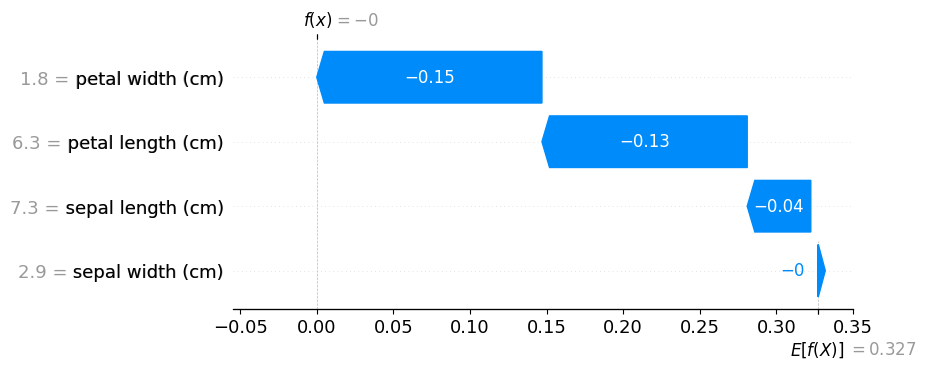

In [84]:
# waterfall plot

shap.waterfall_plot(shap_values[0,:,0])

In [ ]:
# check additivity

shap_values[0,:,0].values.sum()

np.float64(-0.32700000500306486)

In [93]:
(shap_values[0,:,0].base_values + shap_values[0,:,0].values.sum()).round()

np.float64(-0.0)

In [94]:
import matplotlib.pyplot as plt

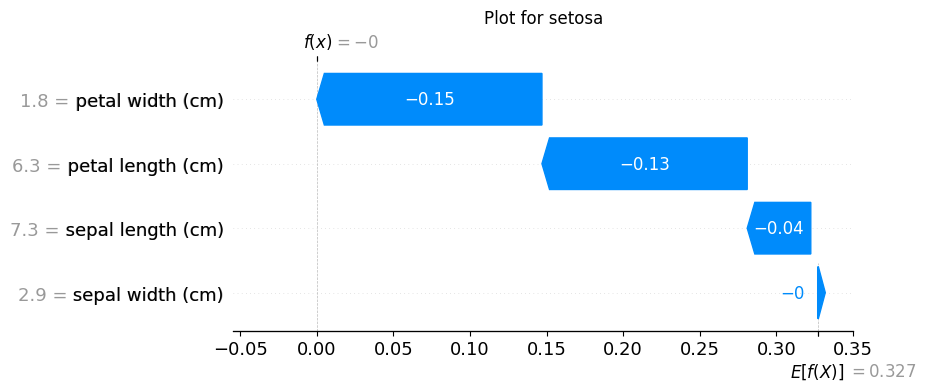

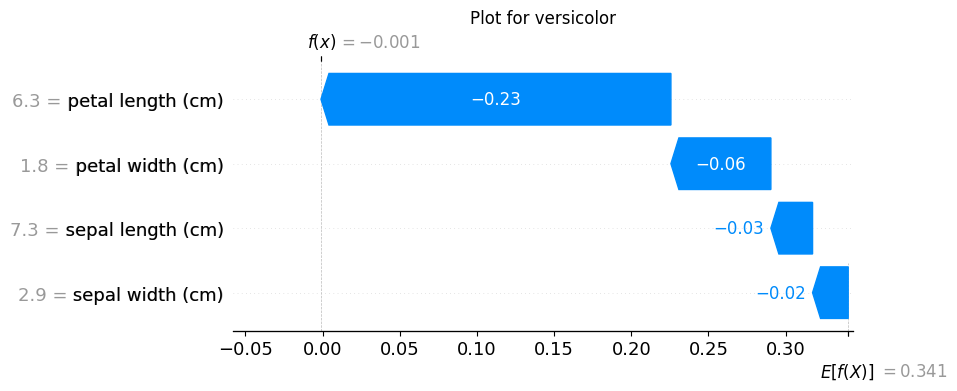

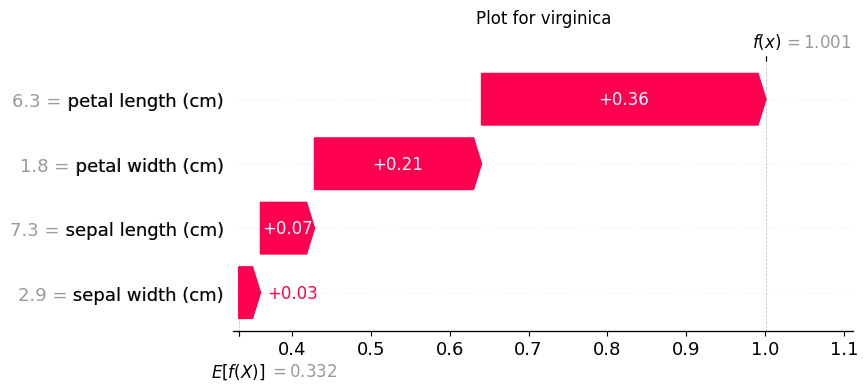

In [95]:
for i in range(len(le.classes_)):
    plt.title(f"Plot for {le.classes_[i]}")
    shap.waterfall_plot(shap_values[0,:,i])
    print("\n\n")

In [98]:
shap_values[0,:,2].values.sum()

np.float64(0.6685000165645033)

In [99]:
shap_values[0,:,2].base_values +  shap_values[0,:,2].values.sum()

np.float64(1.0010000165645032)